In [3]:
import numpy as np
import pandas as pd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border-style: solid;
}

In [5]:
data = pd.read_csv('Q3.csv')

data['Viewed (Log)'] = np.log(data["Viewed"])
data['Selected (Log)'] = np.log(data["Purchased"])
data['Purchased (Log)'] = np.log(data["Purchased"])

data_log = data

data = data.drop(["Viewed (Log)", "Selected (Log)" , "Purchased (Log)"], axis=1)

data


,Category,Traffic Source,Viewed,Selected,Purchased
0,Cosmetics,Direct,23897,2567,1398
1,Cosmetics,Google Organic,56789,2899,657
2,Cosmetics,Ad Network 1,6753,18,5
3,Cosmetics,Ad Network 2,12389,76,65
4,Fashion,Direct,54322,540,386
5,Fashion,Google Organic,98764,345,156
6,Fashion,Ad Network 1,87878,234,75
7,Fashion,Ad Network 2,46567,205,76
8,Electronics,Direct,1789243,376,280
9,Electronics,Google Organic,1256430,485,126


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Category        24 non-null     object
 1   Traffic Source  24 non-null     object
 2   Viewed          24 non-null     int64 
 3   Selected        24 non-null     int64 
 4   Purchased       24 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 1.1+ KB


In [7]:
data.describe()

,Viewed,Selected,Purchased
count,2.400000e+01,24.000000,24.000000
mean,2.189138e+05,339.125000,137.750000
std,4.668393e+05,756.581115,310.322588
min,2.340000e+02,1.000000,0.000000
25%,8.220000e+03,4.000000,2.000000
50%,2.286000e+04,34.000000,11.500000
75%,7.806050e+04,261.750000,88.500000
max,1.789243e+06,2899.000000,1398.000000


In [8]:
traffic_source_agg = data.groupby(["Traffic Source"]).sum().sort_values(by='Purchased', ascending=False)
traffic_source_agg['Efficiency'] = traffic_source_agg['Selected'] / traffic_source_agg['Viewed'] * 100
traffic_source_agg['Effectivity'] = traffic_source_agg['Purchased'] / traffic_source_agg['Viewed'] * 100
traffic_source_agg['Purchase Rate'] = traffic_source_agg['Purchased'] / traffic_source_agg['Selected'] * 100
traffic_source_agg['Share of Sale'] = traffic_source_agg['Purchased'] / traffic_source_agg.sum()['Purchased'] * 100
traffic_source_agg['Share of View'] = traffic_source_agg['Viewed'] / traffic_source_agg.sum()['Viewed'] * 100
traffic_source_agg

,Viewed,Selected,Purchased,Efficiency,Effectivity,Purchase Rate,Share of Sale,Share of View
Traffic Source,,,,,,,,
Direct,1898581,3514,2085,0.185086,0.109819,59.334092,63.067151,36.136397
Google Organic,1431849,3752,954,0.262039,0.066627,25.426439,28.856624,27.252914
Ad Network 2,1026256,483,168,0.047064,0.016370,34.782609,5.081670,19.533111
Ad Network 1,897244,390,99,0.043466,0.011034,25.384615,2.994555,17.077578


In [9]:
traffic_source_average = data.groupby(["Traffic Source"]).mean()
traffic_source_average.columns = ['Average View', 'Average Selected', 'Average Purchased']
traffic_source_average

,Average View,Average Selected,Average Purchased
Traffic Source,,,
Ad Network 1,149540.666667,65.000000,16.5
Ad Network 2,171042.666667,80.500000,28.0
Direct,316430.166667,585.666667,347.5
Google Organic,238641.500000,625.333333,159.0


In [10]:
category_agg = data.groupby(["Category"]).sum().sort_values(by='Purchased', ascending=False)
category_agg['Efficiency'] = category_agg['Purchased'] / category_agg['Viewed'] * 100
category_agg['Effectivity'] = category_agg['Purchased'] / category_agg['Selected'] * 100
category_agg['Purchase Rate'] = category_agg['Purchased'] / category_agg['Selected'] * 100
category_agg['Share of Sale'] = category_agg['Purchased'] / category_agg.sum()['Purchased'] * 100
category_agg['Share of View'] = category_agg['Viewed'] / category_agg.sum()['Viewed'] * 100
category_agg

,Viewed,Selected,Purchased,Efficiency,Effectivity,Purchase Rate,Share of Sale,Share of View
Category,,,,,,,,
Cosmetics,99828,5560,2125,2.128661,38.219424,38.219424,64.277072,1.900063
Fashion,287531,1324,693,0.241017,52.341390,52.341390,20.961887,5.472684
Electronics,3048472,868,406,0.013318,46.774194,46.774194,12.280702,58.022699
Tools $ Office,66180,90,42,0.063463,46.666667,46.666667,1.270417,1.259629
Home Appliances,112405,31,25,0.022241,80.645161,80.645161,0.756201,2.139446
Food,1639514,266,15,0.000915,5.639098,5.639098,0.453721,31.205479


In [11]:
data.groupby(["Category"]).mean()

,Viewed,Selected,Purchased
Category,,,
Cosmetics,24957.00,1390.00,531.25
Electronics,762118.00,217.00,101.50
Fashion,71882.75,331.00,173.25
Food,409878.50,66.50,3.75
Home Appliances,28101.25,7.75,6.25
Tools $ Office,16545.00,22.50,10.50


In [12]:
# fig, axs = plt.subplots(ncols=3)

# sns.swarmplot(x="Category", y="Viewed (Log)", hue="Traffic Source", data=data_log, ax=axs[0])
# sns.swarmplot(x="Category", y="Selected (Log)", hue="Traffic Source", data=data_log, ax=axs[1])
# sns.swarmplot(x="Category", y="Purchased (Log)", hue="Traffic Source", data=data_log, ax=axs[2])

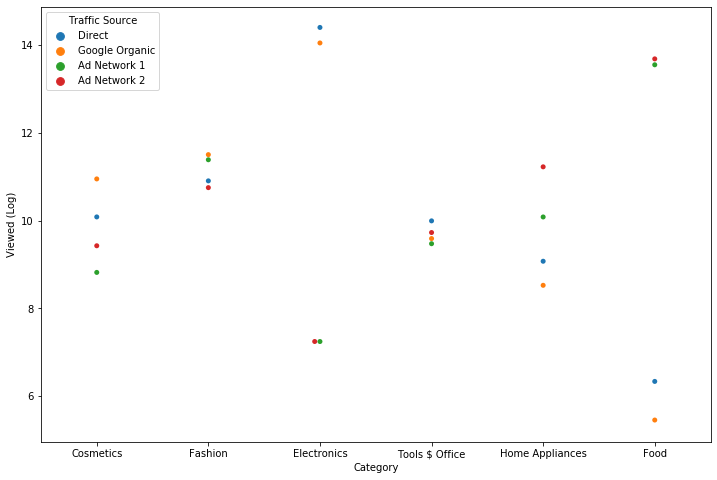

In [13]:
plt.figure(figsize=(12, 8))
sns.swarmplot(x="Category", y="Viewed (Log)", hue="Traffic Source", data=data_log)

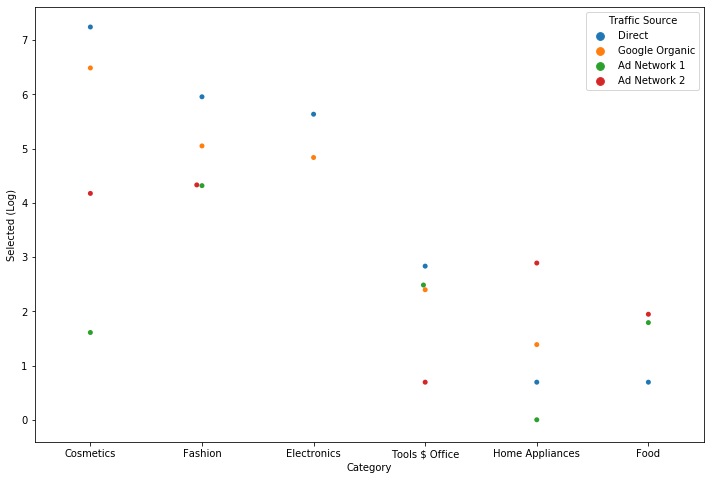

In [14]:
plt.figure(figsize=(12, 8))
sns.swarmplot(x="Category", y="Selected (Log)", hue="Traffic Source", data=data_log)

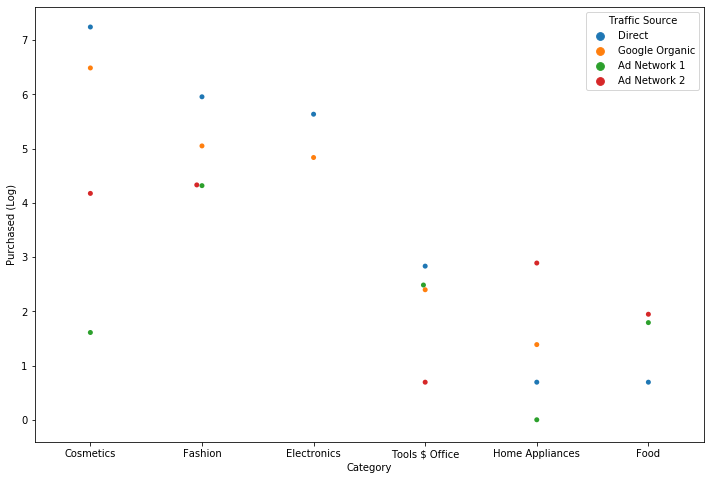

In [15]:
plt.figure(figsize=(12, 8))
sns.swarmplot(x="Category", y="Purchased (Log)", hue="Traffic Source", data=data_log)

# Part 1
## Evaluating Current Situation